# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
torch.set_default_dtype(torch.float)
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV, KFold

import warnings

warnings.filterwarnings('ignore')

<h1 style="background-color: Gray"> Task 1 – Story </h1>

Kiel Credit Consulting is a consulting company which is an expert on credits and long-term loans. It serves different banks to provide them expertise on how to handle their credits. The company works on risk prediction on loans a lot and as a data scientist I work on data analysis and visualization on their projects. This way, I help the company to decide what kind of bad loans should we avoid.

Since, the company mostly works on risk prediction on loans, it thinks that creating a product that can detect loan defaults would be a great investment. So, it has decided to create a proof of concept (poc) for loan default prediction technology. I have been assigned to lead the project since the idea is to use artificial intelligence for it. The project goal is to create different loan default predictors, evaluate, suggest if the poc works or not, and recommend further steps. For this project, both recall score and precision score are very important because we don't want our model help to give loan to a borrower who defaults (false negative) and also we don't our model to 

- This is how I have planed to achieve the project goal:
    - Do exploratory data analysis on the data
    - Preprocess the data to make it ready for training machine learning models
    - Create baseline models, it see how good the data is for the prediction
    - Try different architectures of deep neural networks to train the data and improve the performance
    - Evaluate all predictive models, give a verdict if the poc works and suggest further steps beyond poc.

With this poc project, the company would know if we can go further and invest more time and money to actually develop the loan default prediction product. After its development, it can use it to make their risk prediction tasks efficient and faster. And, of course this would lead to saving more resource of the company. 

<h1 style="background-color:gray;">Task 2 – The Data</h1>

In [2]:
df = pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### Data Description

This dataset has been taken from Kaagle and the primary source of it is Coursera's Loan Default Prediction Challenge. The following lists the column names and their data types and description.
- LoanId (string): A unique identifier for each loan.
- Age (Integer): The age of the borrower.
- Income (Integer): The annual income of the borrower.
- LoanAmount (Integer): The amount of money being borrowed.
- Creditscore (Integer): The credit score of the borrower.
- MonthsEmployed (Integer): The number of months the borrower has been employed
- NumCreditLines (Integer): The number of credit lines the borrower has opened.
- InterestRate (Float): The interest rate for the loan.
- LoanTerm (Integer): The term length for the loan in months. 
- DTIRatio (Integer): The Debt-to-Income ratio, indicating the borrower's debt compared to their income.
- Education (String): The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).
- EmploymentType (String): The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).
- MaritalStatus (String): The marital status of the borrower (Single, Married, Divorced).
- HasMortage (String): Does the borrower have a mortgage (Yes or No).
- HasDependents (String): Does the borrower have dependents (Yes or No).
- LoanPurpose (String): The purpose of the loan or loan type (Home, Auto, Education, Business, Other).
- HasCoSigner (String): Does the loan has a co-signer (Yes or No).
- Default (Integer): This is the target column to predict which indicates where the loan defaulted (1) or not (0). 

### Relevancy of the dataset to the Task 1:
- The project goal is to create different loan default prediction models, so for that we need enough records of transactions of loans.
- We need a dataset which has important features of loan such as borrower's income, credit score, loan amount.
- Moreover, the dataset needs to be historical, meaning each transaction of loan should have already existed and should also indicate if it was defaulted or not.
- And, the dataset presented above satisfies all conditions.

### Licensing and data source

License: [CC0 1.0 Universal Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/)

Data source: https://www.kaggle.com/datasets/nikhil1e9/loan-default

<h1 style="background-color:gray;">Task 3 – IDA</h1>

In [3]:
df.shape

(255347, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df.nunique()

LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

- ***From above information, it is observed that we have 255347 unique records of loan and no column has any null values present***

In [6]:
df.drop(columns=['Default']).describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


***From the above table for numerical columns, we can observe the following statistical information such as***
- mean
- standard deviation(std)
- minimum (min) and maximum (max) values 
- three quartiles of the data (25%, 50%, 75%)
- count


### Target column 'Default' count plot

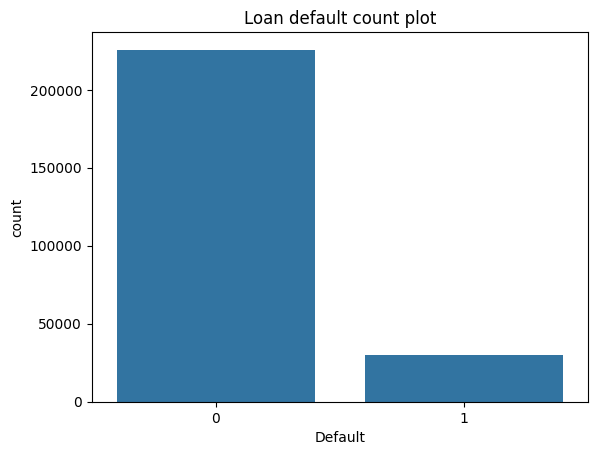

In [7]:
sns.countplot(x='Default', data=df)
plt.title('Loan default count plot')
plt.show()

In [8]:
count_vals = df['Default'].value_counts().values
count_sum = np.sum(count_vals)
print(f'Default type "0": {round((count_vals[0]/count_sum)*100,2)}%')
print(f'Default type "1": {round((count_vals[1]/count_sum)*100,2)}%')

Default type "0": 88.39%
Default type "1": 11.61%


- From the above count plot and cell, it is obvious that we have significantly larger (88.39%) records of loan where it's not defaulted(0) compared to defaulted loan (1)(11.67%). So, this indicates the imbalanced data which we need to treat later steps.

In [9]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

#### Numerical and categorical columns separation in different lists

In [10]:
categorical_cols = ['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner']
numerical_cols = ['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']
target_col = 'Default'

In [11]:
df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

### Function to display count plot for categorical feature

In [12]:
def display_countplot(datafm, column_name):
    """
    Generate and display a count plot for a categorical column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the categorical column for which the count plot is generated.

    Return:
    - None
    """
    plt.figure(figsize=(8,6))
    plt.title('%s bar count plot'%column_name)
    sns.countplot(data=datafm,x=column_name,hue=target_col)
    plt.show()

### Categorical features bar count plot

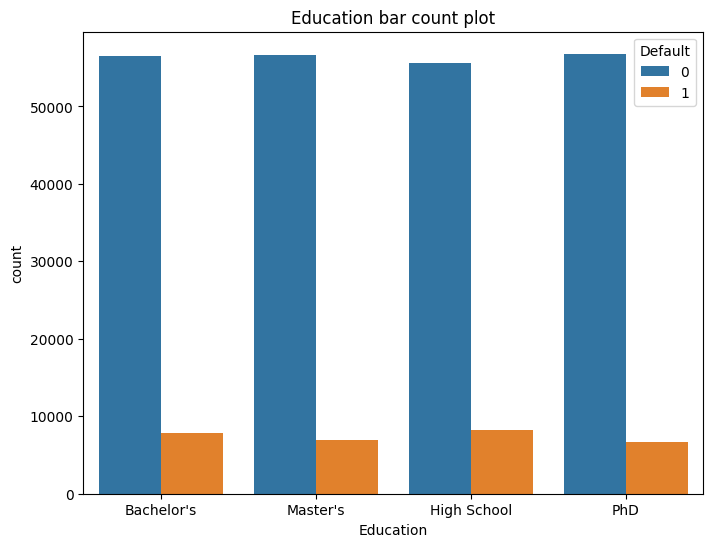

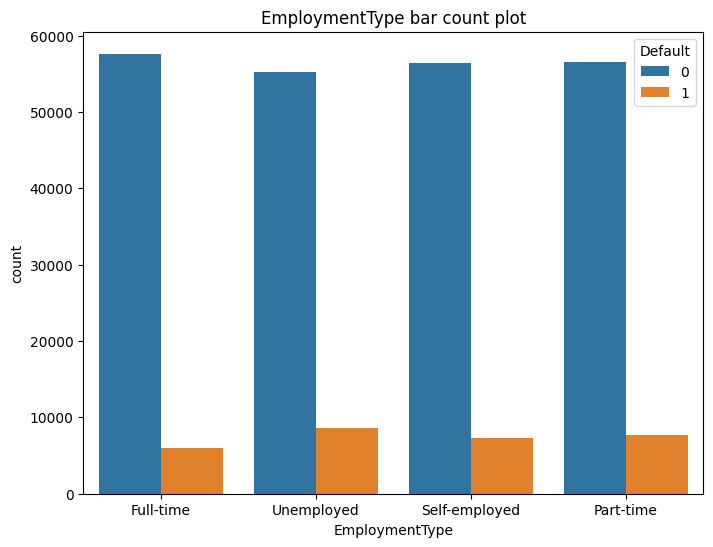

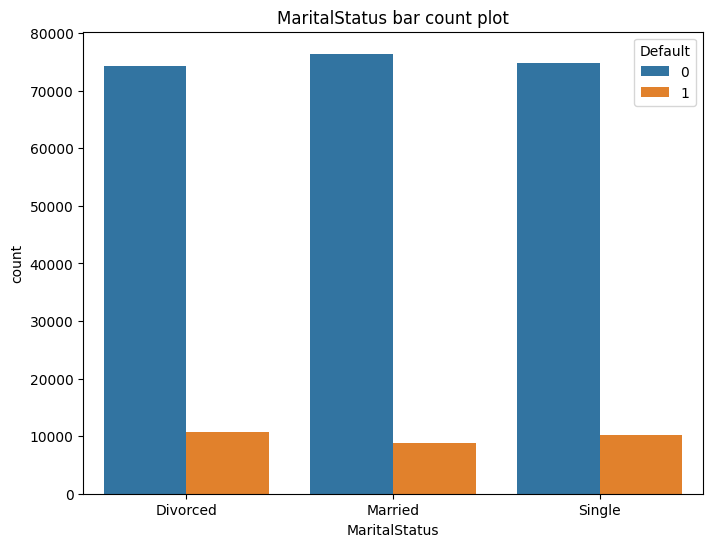

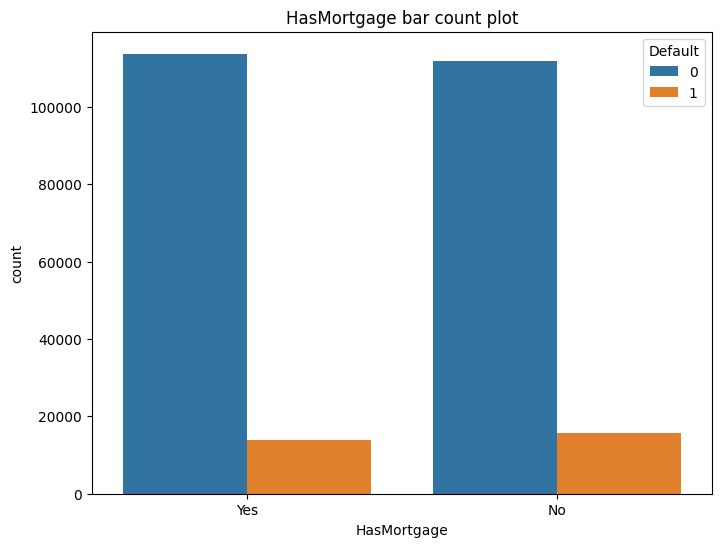

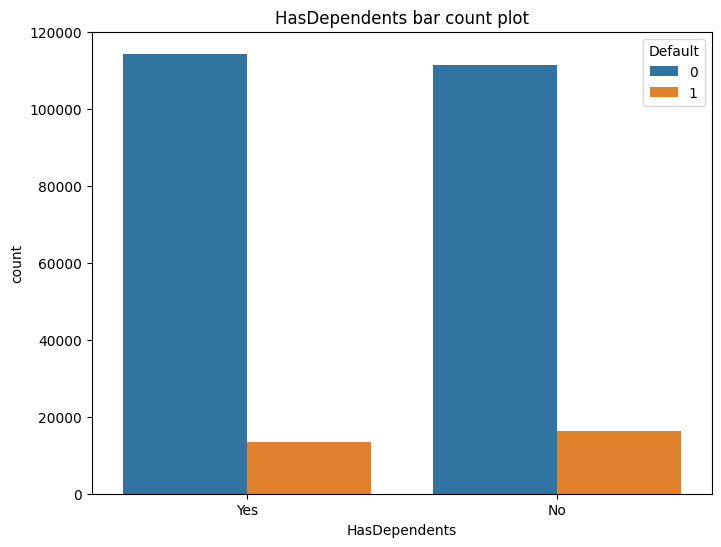

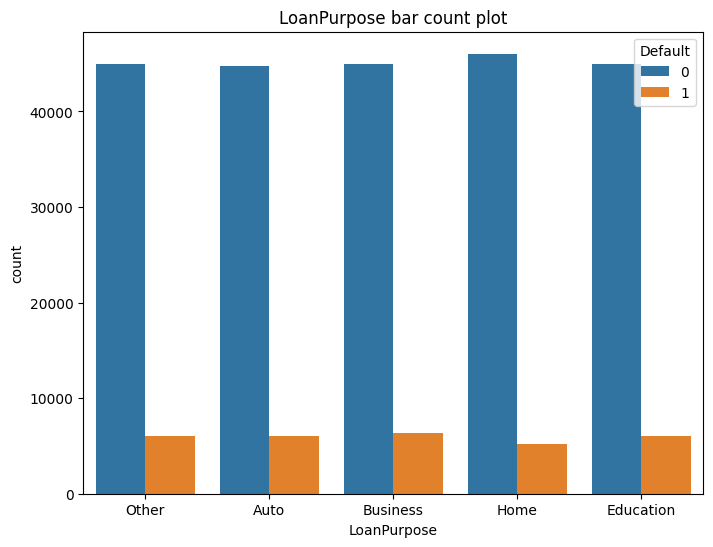

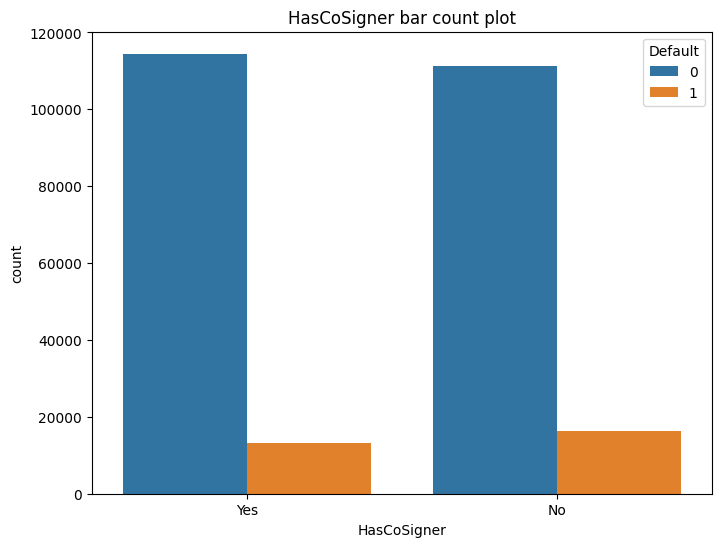

In [13]:
for col in categorical_cols:
    display_countplot(df,col)

***INFERNCES***

- Our data is imbalanced and have larger count of Loan Default == 0, thus from above count plots, we can see the same trend for all categorical features.
- For above categories, surprisingly each category in all features have similar counts

### Function to display box plot for a numerical feature

In [14]:
def display_boxplot(datafm,x_column,y_column):
    plt.figure(figsize=(8,6))
    plt.title('Box plot of %s by Loan %s'%(y_column,x_column))
    sns.boxplot(data=df, x=x_column, y=y_column, width=0.4,palette="Set2")
    plt.show()

### Numerical features box plot 

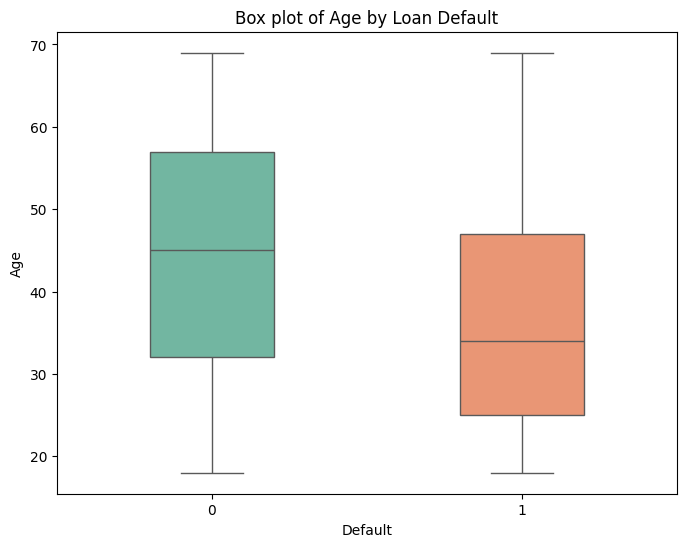

In [15]:
display_boxplot(df,target_col,'Age')

***Inferences***
- From the above box plot, we can observer that the median **age** of borrower who defaults loan is lesser than borrowers who does not default.

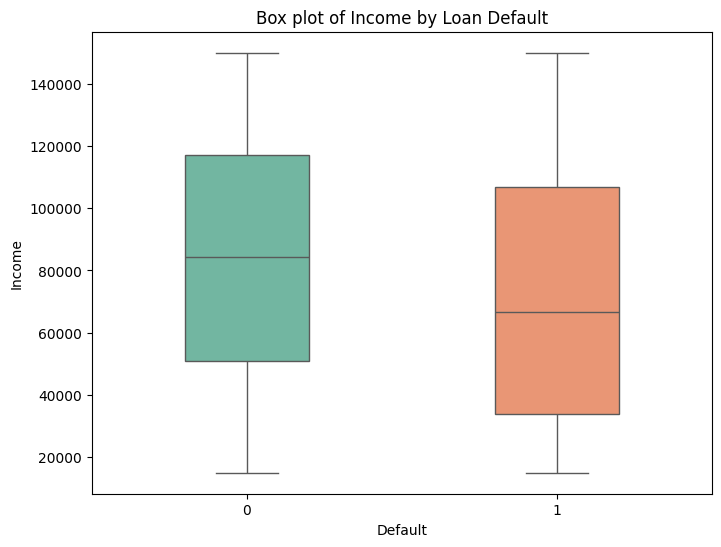

In [16]:
display_boxplot(df,target_col,'Income')

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile **income** of borrower who defaults loan are lesser than borrowers who does not default.

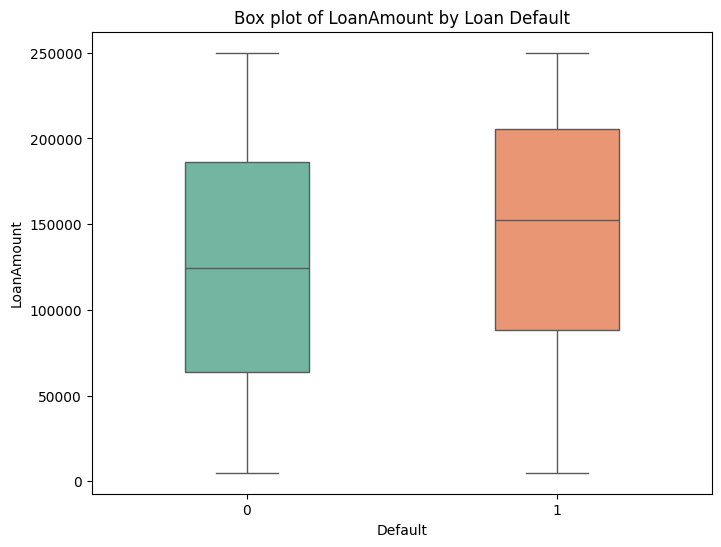

In [17]:
display_boxplot(df,target_col,'LoanAmount')

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile **loan amount** of borrower who defaults loan are greater than borrowers who does not default.

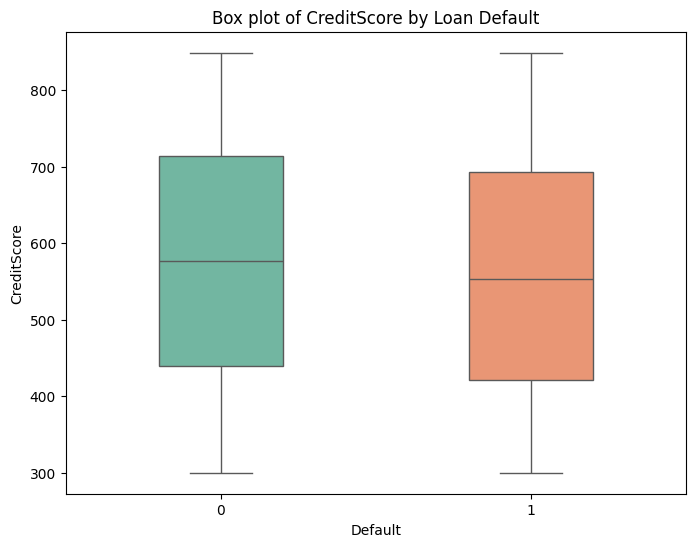

In [18]:
display_boxplot(df,target_col,'CreditScore')

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile **credit score** of borrower who defaults loan are lesser than borrowers who does not default.

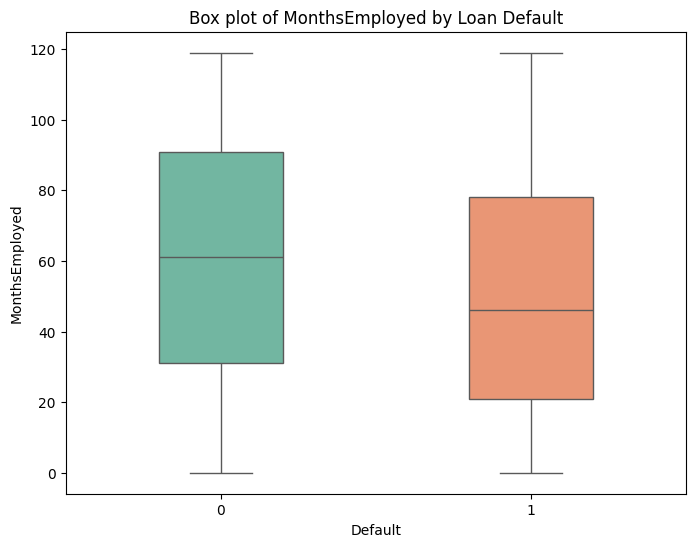

In [19]:
display_boxplot(df,target_col,'MonthsEmployed')

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile of **months employed** of borrower who defaults loan are lesser than borrowers who does not default.

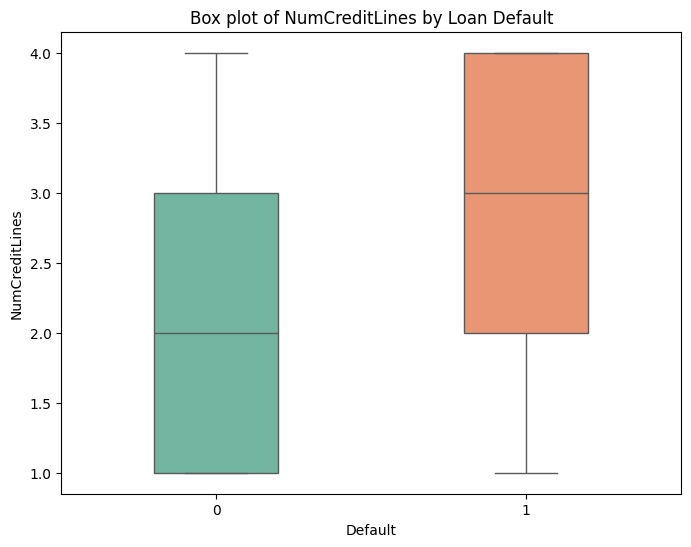

In [20]:
display_boxplot(df,target_col,'NumCreditLines')

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile **num of creditlines** of borrower who defaults loan are significantly greater than borrowers who does not default.

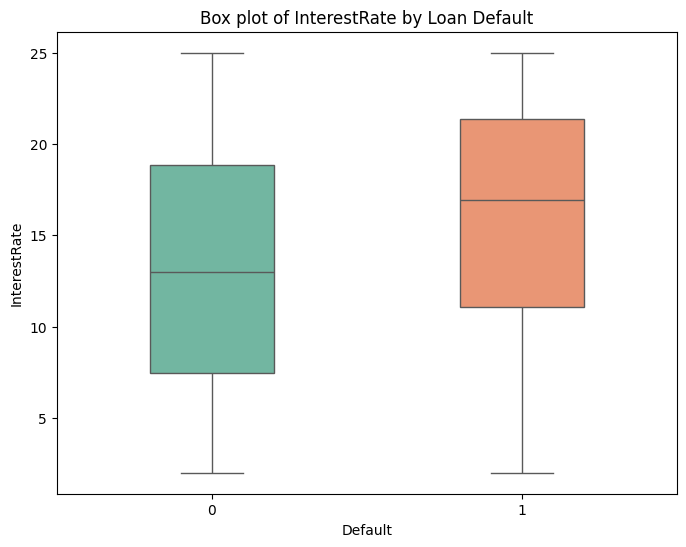

In [21]:
display_boxplot(df,target_col,'InterestRate')

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile interest rate on loans taken by borrowers who default loan are greater than borrowers who does not default.

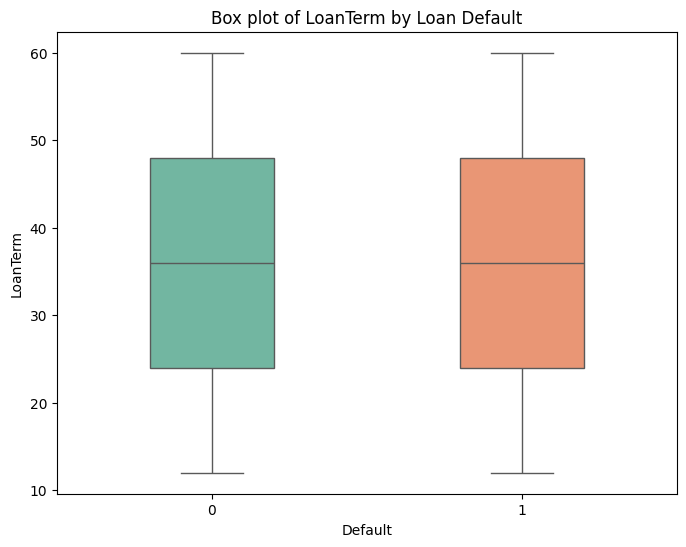

In [22]:
display_boxplot(df,target_col,'LoanTerm')

In [23]:
df['LoanTerm'].value_counts()

LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile **loan term** of borrower who defaults loan are quite similar if not the same.
- The **LoanTerm** feature is numeric in data type but has categorical loan term values (48, 60, 26, 24, 12)

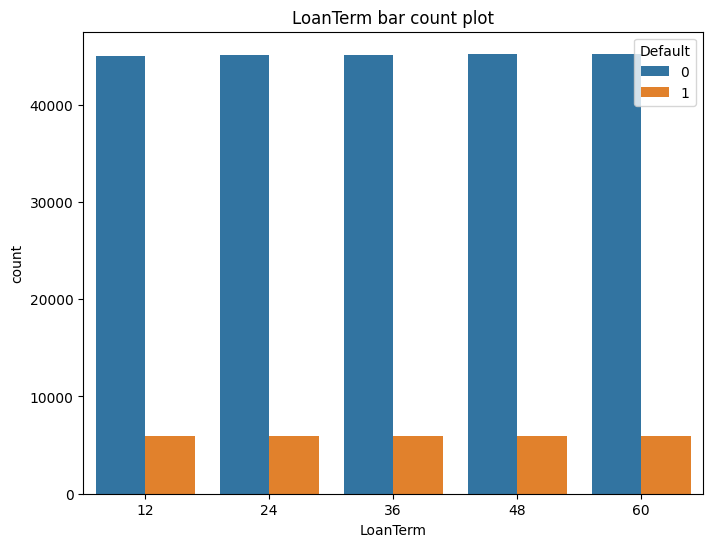

In [24]:
display_countplot(df,'LoanTerm')

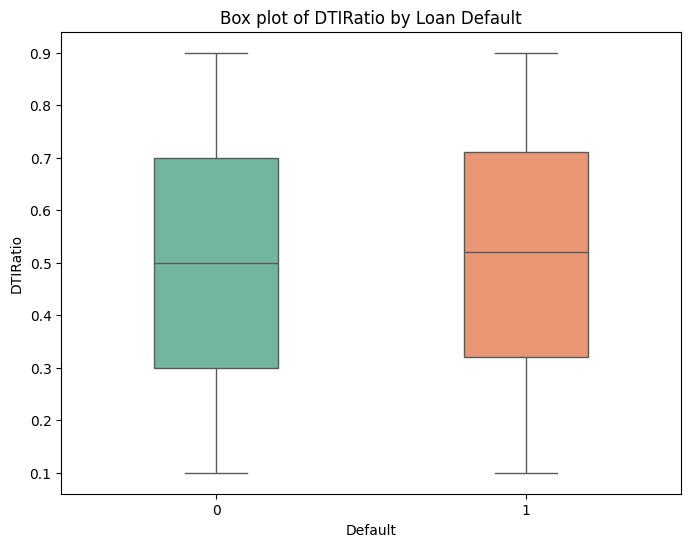

In [25]:
display_boxplot(df,target_col,'DTIRatio')

***Inferences***
- From the above box plot, we can observe that the 25th percentile, median, and 75th percentile DTIRatio of borrower who defaults loan are a bit greater than borrowers who does not default.

<h1 style="background-color:gray;">Task 4 – EDA, Preprocessing</h1>

This task follows the following steps:
- Dropping unnecessary columns
- Convert categorical feature to dummy variables
- Scale all numerical features but target column **Default**
- Split the dataset into test and training where test data would be used to evaluate the performance of all models that would be built later in the steps
- Undersample the training dataset since it is highly unbalanced as it was observed in the above steps.
- Split the full training dataset into train and validation set (validation is used for hyptertuning in deep learning models)

### Dropping LoanID column

In [26]:
df = df.drop(columns=['LoanID'])

### Converting binary valued categorical features having vaues Yes and No to 1 and 0 respectively

In [27]:
binary_cols = []
for col in categorical_cols:
    print(df[col].value_counts())
    if len(df[col].value_counts().values) == 2:
        binary_cols.append(col)

print(binary_cols)


Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64
['HasMortgage', 'HasDependents', 'HasCoSigner']


In [28]:
for col in binary_cols:
    df[col] = df[col].replace({'Yes':1, 'No':0})

In [29]:
df[binary_cols].head()

,HasMortgage,HasDependents,HasCoSigner
0,1,1,1
1,0,0,1
2,1,1,0
3,0,0,0
4,0,1,0


### Converting categorical features with multiple values greater than 2 to dummy variables

In [30]:
multi_cols = list(set(categorical_cols) - set(binary_cols))
multi_cols

['LoanPurpose', 'EmploymentType', 'Education', 'MaritalStatus']

In [31]:
df_encoded = pd.get_dummies(df, columns=multi_cols,dtype=int)
df_encoded.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,0,1,0,0,0,1,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,0,0,0,0,1,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,0,0,1,0,0,1,0,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,0,1,0,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,0,1,1,0,0,0,1,0,0


In [32]:
df_encoded.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'EmploymentType_Full-time',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'Education_Bachelor's',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  int64  
 10  HasDependents                 255347 non-null  int64  
 11  HasCoSigner                   255347 non-null  int64  
 12  Default                       255347 non-nul

In [34]:
numerical_cols

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio']

### Exploring distribution of numerical columns before scaling them

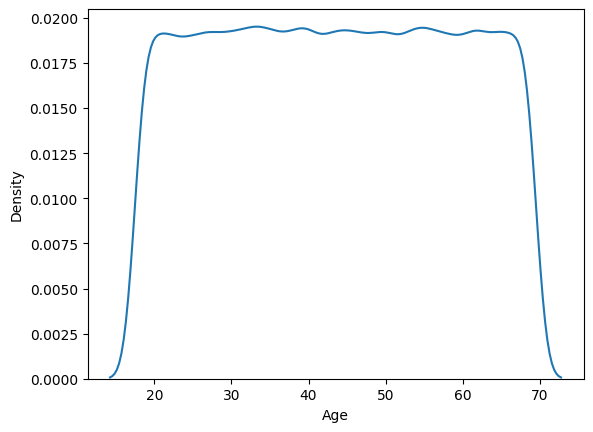

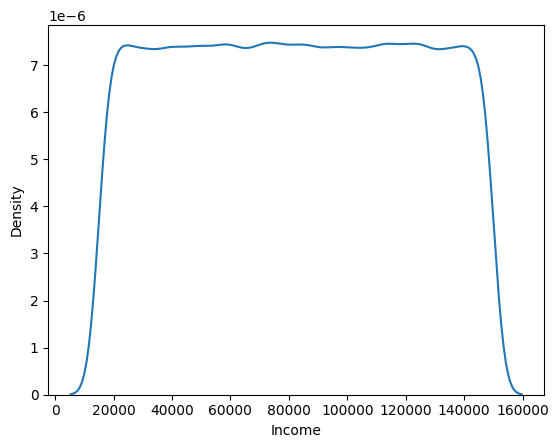

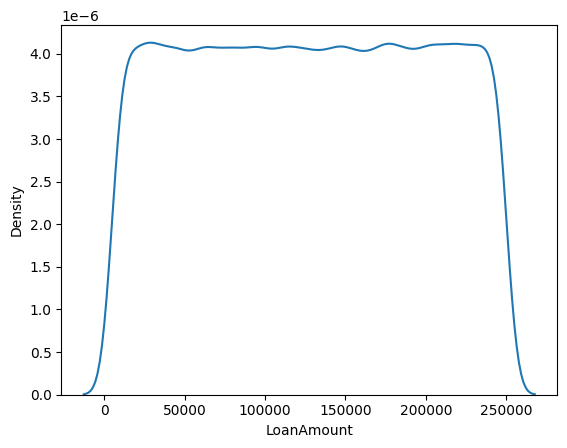

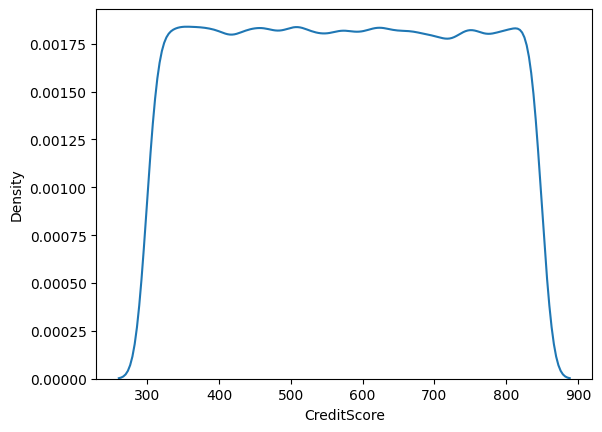

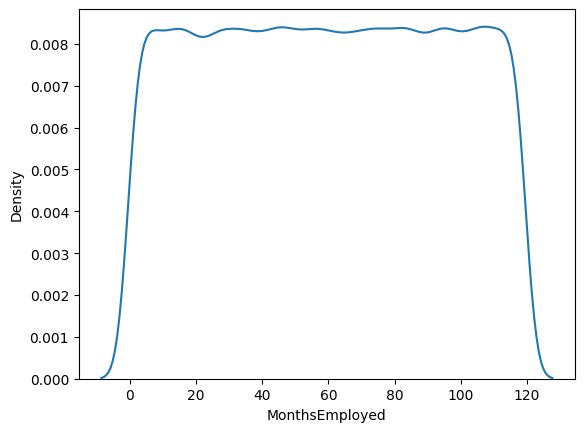

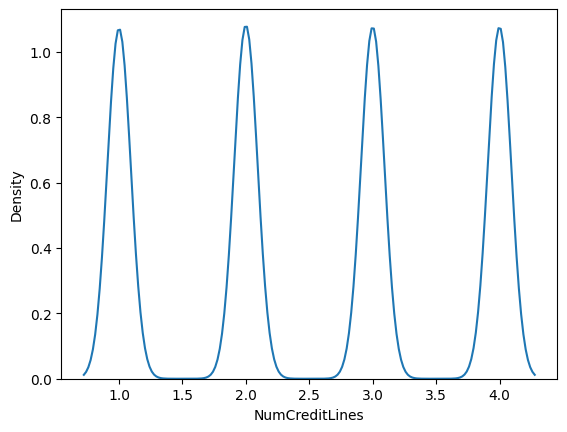

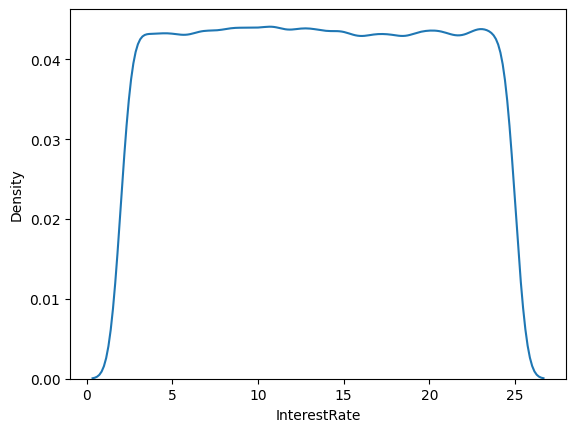

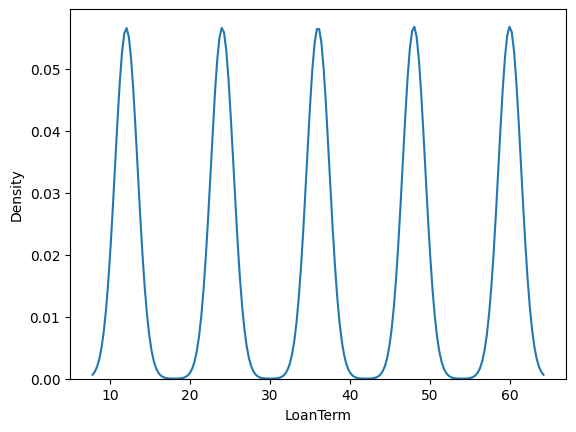

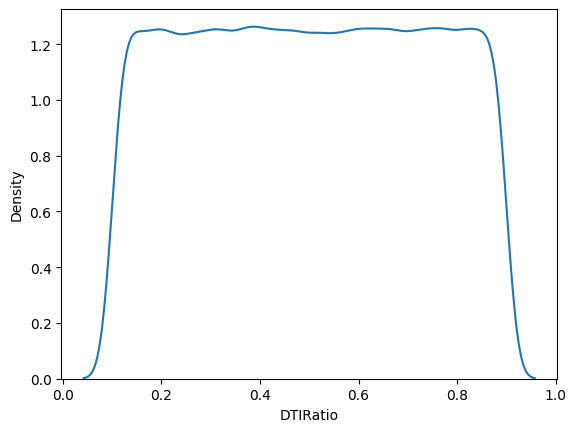

In [35]:
for col in numerical_cols:
    sns.kdeplot(data=df,x=col)
    plt.show()

***Inferences***
- From above plots, it is observed that there are no extreme values for any features so no outlier treatment is required.
- The **LoanTerm** and **NumCreditLines** features are discrete in nature.
- Since, we don't have outliers issue, and even the discrete features are ordinal in nature, **MIN-MAX** scaling will be used for data standardization.

### Min-Max scaling of numerical variables

In [36]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
df_scaled = df_encoded.copy(deep=True)

# Fit and transform the data using Min-Max scaling
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])
df_scaled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,1,...,0,0,0,1,0,0,0,1,0,0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0,...,0,0,0,0,0,1,0,0,1,0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,1,...,0,0,1,0,0,1,0,1,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0,...,0,0,0,0,1,0,0,0,1,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,...,0,0,1,1,0,0,0,1,0,0


### Split the data into X as independent variables and y as target variable

In [37]:
X = df_scaled.drop(columns=['Default'])
y = df_scaled['Default']

In [38]:
print(X.shape)
print(y.shape)
print('Value counts for target variable = ', y.value_counts())

(255347, 28)
(255347,)
Value counts for target variable =  Default
0    225694
1     29653
Name: count, dtype: int64


### Split the independent variables and target variable into training and test data

In [39]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
print(f'Shape of X_train_full: {X_train_full.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train_full: {y_train_full.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train_full: (178742, 28)
Shape of X_test: (76605, 28)
Shape of y_train_full: (178742,)
Shape of y_test: (76605,)


In [40]:
y_test.value_counts()

Default
0    67709
1     8896
Name: count, dtype: int64

In [41]:
y_train_full.value_counts()

Default
0    157985
1     20757
Name: count, dtype: int64

### Undersampling
From above cells, we can observe that 0 and 1 values in target variable are quite imbalanced, so we can do undersample to match samples count from both classes

In [42]:
# undersampling the majority class '0' in target variable 'Default' 
rus = RandomUnderSampler(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = rus.fit_resample(X_train_full, y_train_full)
print(X_resampled.shape)
print(y_resampled.shape)

(41514, 28)
(41514,)


In [43]:
print('Balanced target variable shape:')
y_resampled.value_counts()

Balanced target variable shape:


Default
0    20757
1    20757
Name: count, dtype: int64

### Split undersampled full training data into training and validation data

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=1)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')

Shape of X_train: (29059, 28)
Shape of X_val: (12455, 28)
Shape of y_train: (29059,)
Shape of y_val: (12455,)


In [45]:
y_train.value_counts()

Default
1    14560
0    14499
Name: count, dtype: int64

In [46]:
y_val.value_counts()

Default
0    6258
1    6197
Name: count, dtype: int64

- From the above y_val and y_train value counts, we can observe that both target lables are balanced

<h1 style="background-color:gray">Task 5 – Baselines</h1>

### Dataframe to store performance metrics of models

In [47]:
metrics_df = pd.DataFrame(columns=('algorithm','accuracy','precision','recall','f1_score','auc_score'))
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score


### Function to calculate the performance metrics

In [48]:
def calulate_metrics(y_real, y_predict, algo):
    accuracy = balanced_accuracy_score(y_real, y_predict)
    precision = precision_score(y_real, y_predict)
    recall = recall_score(y_real, y_predict)
    f1 = f1_score(y_real, y_predict)
    auc = roc_auc_score(y_real, y_predict)

    return {'algorithm':algo,'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1_score':f1, 'auc_score':auc}

<h3 style="background-color: navy;">5.1 - Simple Baseline classification model i.e. DummyClassifier</h3>

In [49]:
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
metrics_data = calulate_metrics(y_test, y_pred, 'dummy-classifier(uniform)')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.50045,0.188197,0.499416


In [50]:
# classfication report for dummy classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64     67709
           1       0.12      0.50      0.19      8896

    accuracy                           0.50     76605
   macro avg       0.50      0.50      0.41     76605
weighted avg       0.79      0.50      0.59     76605



<h3 style="background-color: navy;">5.2 Logistic regression without tuning of hyperparameters</h3>

In [51]:
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
metrics_data = calulate_metrics(y_test, y_pred, 'logistic regression')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.500450,0.188197,0.499416
1,logistic regression,0.687610,0.220690,0.699978,0.335579,0.687610


In [52]:
# classfication report for logisitic regression classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67709
           1       0.22      0.70      0.34      8896

    accuracy                           0.68     76605
   macro avg       0.58      0.69      0.56     76605
weighted avg       0.86      0.68      0.74     76605



<h1 style="background-color:gray">Task 6 – Deep Learning Experiments</h1>

Steps for this task are as follows:
- Create tensors of training, validation and test data for pytorch
- Create functions for early stopping, training model and evaluating it
- Set up standard learning hyperparameters suited for the task
- Create and train three different architectures (3 layered, 4 layered, and 5 layered) neural networks (no optimization)
- Calculate the built models' metrics
- Append to metrics_df (defined in task 5)
- Optimize the model hyperparameters (no of neurons and activation function) of three neural networks defined
- Train and evaluate their metrics
- Append to metrics_df and compare with baseline models
- Present results and thoughts on performance of different architectures.

### Create tensors for PyTorch

In [53]:
X_train_tensor = torch.Tensor(X_train.values)
X_val_tensor = torch.Tensor(X_val.values)
X_test_tensor = torch.Tensor(X_test.values)

y_train_tensor = torch.Tensor(y_train.values)
y_val_tensor = torch.Tensor(y_val.values)
y_test_tensor = torch.Tensor(y_test.values)

### Class for earlystopping

Reference: https://github.com/jeffheaton/app_deep_learning/blob/main/t81_558_class_03_4_early_stop.ipynb

In [54]:
class EarlyStopping:
    def __init__(self, patience=50, min_delta=0, restore_best_weights=True):
        """
        Initialize EarlyStopping instance.

        Parameters:
        - patience (int): Number of epochs with no improvement after which training will be stopped.
        - min_delta (float): Minimum change in monitored quantity to qualify as an improvement.
        - restore_best_weights (bool): Whether to restore model weights from the epoch with the best value.

        Attributes:
        - patience (int): Number of epochs with no improvement allowed.
        - min_delta (float): Minimum change in monitored quantity to be considered an improvement.
        - restore_best_weights (bool): Whether to restore model weights from the epoch with the best value.
        - best_model (dict): Copy of the model's state_dict at the epoch with the best performance.
        - best_acc (float): Best validation accuracy achieved.
        - counter (int): Number of epochs with no improvement.
        - epoch (int): Current epoch number.
        - status (str): Current status message indicating the training progress.
        - best_epoch (int): Epoch number with the best performance.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_acc = None
        self.counter = 0
        self.epoch = 0
        self.status = ""
        self.best_epoch = None

    def __call__(self,model,acc_val,epoch):
        """
        Call method to check for early stopping conditions and update internal state.

        Parameters:
        - model: The PyTorch model being trained.
        - acc_val (float): Validation accuracy at the current epoch.
        - epoch (int): Current epoch number.

        Returns:
        - bool: True if early stopping criteria are met, False otherwise.
        """
        self.epoch = epoch
        self.best_epoch = epoch
        if self.best_acc is None:
            self.best_acc = acc_val
            self.best_model = copy.deepcopy(model.state_dict())
        elif acc_val - self.best_acc >= self.min_delta:
            self.best_model = copy.deepcopy(model.state_dict())
            self.best_acc = acc_val
            self.counter = 0
            self.status = f"Improvement found, counter reset to {self.counter}"
        else:
            self.counter += 1
            self.status = f"No improvement in the last {self.counter} epochs"
            if self.counter >= self.patience:
                self.status = f"Early stopping at {self.epoch} epochs."
                self.best_epoch = self.epoch - self.patience
                if self.restore_best_weights:
                    model.load_state_dict(self.best_model)
                return True
        return False

### Function to train a model

Reference: <u>Deep Learning Lecture</u>

In [55]:
def train_model(model, epochs, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, patience, min_delta):
    """
    Train a PyTorch model using the specified parameters.

    Parameters:
    - model: The PyTorch model to be trained.
    - epochs (int): Number of training epochs.
    - criterion: The loss function used for training.
    - optimizer: The optimization algorithm for updating model parameters.
    - X_train_tensor: Training input data as a PyTorch tensor.
    - y_train_tensor: Training target data as a PyTorch tensor.
    - X_val_tensor: Validation input data as a PyTorch tensor.
    - y_val_tensor: Validation target data as a PyTorch tensor.
    - patience (int): Number of epochs with no improvement after which training will be stopped (used for EarlyStopping).
    - min_delta (float): Minimum change in monitored quantity to qualify as an improvement (used for EarlyStopping).

    Returns:
    - tuple: A tuple containing the best model's state_dict, the epoch at which the best model was achieved,
             the best validation loss, and the best validation accuracy.
    """
    writer = SummaryWriter()
    best_acc_val = float('-inf')
    best_loss_val = float('inf')
    best_model=copy.deepcopy(model.state_dict())
    best_epoch = 0
    es = EarlyStopping(patience, min_delta)

    for epoch in range(epochs):
        model.train() # instantiate the model training
        y_train_pred = model(X_train_tensor) # train by pasing training data as a tensor 
        
        optimizer.zero_grad() # clear previous gradients if any  
        loss_train = criterion(y_train_pred, y_train_tensor.reshape(-1,1)) # get training loss using criterion passed
        loss_train.backward() # backpropagate to calcuate the model's gradients
        optimizer.step() # update the model's weights and baises using calculated gradients 
        model.eval() # set the model to evaluation mode

        with torch.no_grad():
            y_val_pred = model(X_val_tensor)
            loss_val = criterion(y_val_pred, y_val_tensor.reshape(-1,1))
            # write validation and training loss in tensorboard runs, so that we can track real-time performance of the model
            writer.add_scalars("loan_default/loss", {'train': loss_train.item(), 'val': loss_val.item()}, epoch)

            # convert y_train_pred and y_val_pred into 1-d vector and round off (x>0.5 = 1 else 0)
            y_train_pred = y_train_pred.reshape(-1).round()
            y_val_pred = y_val_pred.reshape(-1).round()
            # calculate accuracy on training and validation
            acc_train = (y_train_pred == y_train_tensor).sum().item() / y_train_pred.size(0)
            acc_val = (y_val_pred == y_val_tensor).sum().item() / y_val_pred.size(0)
            # write validation and training loss in tensorboard runs, so that we can track real-time performance of the model
            writer.add_scalars("loan_default/acc", {'train': acc_train, 'val': acc_val}, epoch)
            writer.flush() # flushes all pending files to disk

            # track best epoch based on based validation accuracy
            # this is required if the early stopping below never gets triggered
            if acc_val > best_acc_val:
                best_epoch = epoch
            
            # if EarlyStopping object satisfies the condition to stop, we stop the training and save all necessary metrics
            if es(model, acc_val, epoch):
                best_acc_val = es.best_acc
                best_loss_val = loss_val.item()
                best_model = es.best_model
                best_epoch = es.best_epoch
                print(es.status)
                break

        if (epoch % 10==9):
            print("Epoch: %d, loss: %1.5f, acc: %1.5f" % (epoch, loss_train.item(), acc_train))
        
    writer.close()

    return best_model, best_epoch, best_loss_val, best_acc_val

### Function to predict the output by the model

In [56]:
def predict(model, X):
    '''
    Use the model to predict for the values in the test set.
    Return the prediction
    '''
    model.eval()
    with torch.no_grad():
        return model(X)


### Function to calculate performance metrics on each deep learning model

In [57]:
def evaluate_deep_model_metrics(model, best_model, X_test_tensor, y_test_tensor, algo):
    """
    Evaluate a deep learning model using the best model obtained during training.

    Parameters:
    - model: The original PyTorch model architecture.
    - best_model: The best model obtained during training.
    - X_test_tensor: Test input data as a PyTorch tensor.
    - y_test_tensor: Test target data as a PyTorch tensor.
    - algo (str): A string indicating the algorithm or model name.

    Returns:
    - metrics_data: A dictionary containing various evaluation metrics (e.g., accuracy, precision, recall).
    """
    # load the weights of the best model found from training and early stopping
    model.load_state_dict(best_model)
    model.eval() # put the model at evaluation mode

    # predict on test data
    y_test_pred = predict(model, X_test_tensor)
    y_test_pred = y_test_pred.reshape(-1).round()
    metrics_data = calulate_metrics(y_test_tensor, y_test_pred, algo)
    return metrics_data

### Function to print best model, epoch and accuracy

In [58]:
def print_best_params(best_epoch, best_loss_val, best_acc_val):
    """
    Print the best parameters obtained during model training.

    Parameters:
    - best_epoch (int): The epoch number with the best performance.
    - best_loss_val (float): The best validation loss achieved.
    - best_acc_val (float): The best validation accuracy achieved.
    """
    print(f'Best epoch = {best_epoch}')
    print(f'Best validation loss = {best_loss_val}')
    print(f'Best validation accuracy = {best_acc_val}')

#### Hyperparameters selection and description

- Since, we are doing binary classification, 'Binary Cross Entropy' loss is used for all the architectures
- Optimizer used in the experiment was Adam which is one of the most effective and popular optimization technique.
- The learning rate used is: 0.01 (learning rates such as 0.001, 0.0001 were also experimented, but their impact was either insignificant or undesirable so they are deleted and not shown in following cells)
- Epochs used: 3000
- Patience for early stopping (It indicates Number of epochs with no improvement after which training will be stopped): 100 (Even experimented with 5,10,20,50 and 500, but were left out because of their insignificancy)
- min_delta (Minimum change in monitored quantity to qualify as an improvement): 0
- The output layer on all neural networks defined below is using sigmoid activation function because our task is binary classification, so this is the best suited for it.

### Set learning hyperparameters for all neural networks that are common to use

In [59]:
criterion = torch.nn.BCELoss()
learning_rate = 0.01
epochs = 3000
patience = 100 
min_delta = 0

# setting the seed to 1
torch.manual_seed(1)
input_size = X_train.shape[1]

### A child class for nn.Module and a base/parent class for other neural networks defined below

- This class has a method to validate the hidden size that is defined at the initialization of the neural network classifier.
- This is important because hidden size is the no of neurons of the first hidden layer and for all other subsequent hidden layers, no of neurons are decreased by the factor of 2.
- You can observe this on each class of neural network classifier __init__ method.

In [60]:
class MultiLayerPercepton(nn.Module):

    def _validate_hidden_size__(self, hidden_size, factor):
        if np.floor(hidden_size/factor) < 1:
            raise Exception('Hidden size too small')
        
    def __init__(self):
        super(MultiLayerPercepton, self).__init__()


<h2 style="background-color:navy;">a) 3-layered deep model training and evaluation</h2>

In [61]:
class ThreeLayerClassifier(MultiLayerPercepton):
        
    def __init__(self, input_size, hidden_size, activation):
        self._validate_hidden_size__(hidden_size, 2)
        super(ThreeLayerClassifier, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation
        
        self.fc1 = nn.Linear(input_size, int(np.floor(self.hidden_size)))
        self.fc2 = nn.Linear(int(np.floor(self.hidden_size)), int(np.floor(self.hidden_size/2)))
        self.fc3 = nn.Linear(int(np.floor(self.hidden_size/2)), 1)

    def forward(self, x):
        
        out1 = self.activation(self.fc1(x))
        out2 = self.activation(self.fc2(out1))
        out3 = nn.Sigmoid()(self.fc3(out2))
        
        return out3

### Run training model

In [62]:
model_3l = ThreeLayerClassifier(input_size, 128, nn.ReLU())
optimizer = torch.optim.Adam(model_3l.parameters(), lr=learning_rate)

best_model, best_epoch, best_loss_val, best_acc_val = \
    train_model(model_3l, epochs, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, patience, min_delta)

Epoch: 9, loss: 0.61207, acc: 0.66692
Epoch: 19, loss: 0.59371, acc: 0.68258
Epoch: 29, loss: 0.59272, acc: 0.68323
Epoch: 39, loss: 0.58916, acc: 0.68719
Epoch: 49, loss: 0.58572, acc: 0.69025
Epoch: 59, loss: 0.58108, acc: 0.69362
Epoch: 69, loss: 0.57685, acc: 0.69865
Epoch: 79, loss: 0.57378, acc: 0.69909
Epoch: 89, loss: 0.57219, acc: 0.70188
Epoch: 99, loss: 0.56705, acc: 0.70622
Epoch: 109, loss: 0.56471, acc: 0.70866
Epoch: 119, loss: 0.56651, acc: 0.70591
Early stopping at 129 epochs.


In [63]:
print_best_params(best_epoch, best_loss_val, best_acc_val)

Best epoch = 29
Best validation loss = 0.6093890070915222
Best validation accuracy = 0.6745082296266559


### Prediction on test data 

In [64]:
metrics_data = evaluate_deep_model_metrics(model_3l, best_model, X_test_tensor, y_test_tensor, '3L-NN')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.500450,0.188197,0.499416
1,logistic regression,0.687610,0.220690,0.699978,0.335579,0.687610
2,3L-NN,0.685239,0.216332,0.706947,0.331288,0.685239


<h2 style="background-color:navy;">b) 4-layered deep model training and evaluation</h2>

In [65]:
class FourLayerClassifier(MultiLayerPercepton):

    def __init__(self, input_size, hidden_size, activation):
        self._validate_hidden_size__(hidden_size, 4)
        super(FourLayerClassifier, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation
        
        self.fc1 = nn.Linear(input_size, int(np.floor(self.hidden_size)))
        self.fc2 = nn.Linear(int(np.floor(self.hidden_size)), int(np.floor(self.hidden_size/2)))
        self.fc3 = nn.Linear(int(np.floor(self.hidden_size/2)), int(np.floor(self.hidden_size/4)))
        self.fc4 = nn.Linear(int(np.floor(self.hidden_size/4)), 1)

    def forward(self, x):
        
        out1 = self.activation(self.fc1(x))
        out2 = self.activation(self.fc2(out1))
        out3 = self.activation(self.fc3(out2))
        out4 = nn.Sigmoid()(self.fc4(out3))
        
        return out4

### Run training model

In [66]:
model_4l = FourLayerClassifier(input_size, 128, nn.ReLU())
optimizer = torch.optim.Adam(model_4l.parameters(), lr=learning_rate)

best_model, best_epoch, best_loss_val, best_acc_val = \
    train_model(model_4l, epochs, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, patience, min_delta)

Epoch: 9, loss: 0.64990, acc: 0.65364
Epoch: 19, loss: 0.60583, acc: 0.67721
Epoch: 29, loss: 0.60327, acc: 0.67662
Epoch: 39, loss: 0.59473, acc: 0.68413
Epoch: 49, loss: 0.59155, acc: 0.68561
Epoch: 59, loss: 0.58982, acc: 0.68884
Epoch: 69, loss: 0.58766, acc: 0.68939
Epoch: 79, loss: 0.58554, acc: 0.69115
Epoch: 89, loss: 0.58322, acc: 0.69235
Epoch: 99, loss: 0.58080, acc: 0.69287
Epoch: 109, loss: 0.57795, acc: 0.69586
Epoch: 119, loss: 0.57440, acc: 0.69903
Epoch: 129, loss: 0.57203, acc: 0.69982
Epoch: 139, loss: 0.57152, acc: 0.69834
Epoch: 149, loss: 0.56568, acc: 0.70467
Epoch: 159, loss: 0.56279, acc: 0.70591
Epoch: 169, loss: 0.55957, acc: 0.70873
Epoch: 179, loss: 0.56066, acc: 0.70670
Epoch: 189, loss: 0.57210, acc: 0.69441
Epoch: 199, loss: 0.55296, acc: 0.71296
Epoch: 209, loss: 0.54835, acc: 0.71468
Epoch: 219, loss: 0.54864, acc: 0.71413
Epoch: 229, loss: 0.54689, acc: 0.71623
Early stopping at 237 epochs.


In [67]:
print_best_params(best_epoch, best_loss_val, best_acc_val)

Best epoch = 137
Best validation loss = 0.6273818016052246
Best validation accuracy = 0.6751505419510236


### Prediction on test data 

In [68]:
metrics_data = evaluate_deep_model_metrics(model_4l, best_model, X_test_tensor, y_test_tensor,'4l-NN')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.500450,0.188197,0.499416
1,logistic regression,0.687610,0.220690,0.699978,0.335579,0.687610
2,3L-NN,0.685239,0.216332,0.706947,0.331288,0.685239
3,4l-NN,0.683075,0.209858,0.724595,0.325457,0.683075


<h2 style="background-color:navy;">c) 5-layered deep model training and evaluation</h2>

In [69]:
class FiveLayerClassifier(MultiLayerPercepton):
    
    def __init__(self, input_size, hidden_size, activation):
        self._validate_hidden_size__(hidden_size, 8)
        super(FiveLayerClassifier, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation
        
        self.fc1 = nn.Linear(input_size, int(np.floor(self.hidden_size)))
        self.fc2 = nn.Linear(int(np.floor(self.hidden_size)), int(np.floor(self.hidden_size/2)))
        self.fc3 = nn.Linear(int(np.floor(self.hidden_size/2)), int(np.floor(self.hidden_size/4)))
        self.fc4 = nn.Linear(int(np.floor(self.hidden_size/4)), int(np.floor(self.hidden_size/8)))
        self.fc5 = nn.Linear(int(np.floor(self.hidden_size/8)), 1)

    def forward(self, x):
        
        out1 = self.activation(self.fc1(x))
        out2 = self.activation(self.fc2(out1))
        out3 = self.activation(self.fc3(out2))
        out4 = self.activation(self.fc4(out3))
        out5 = nn.Sigmoid()(self.fc5(out4))
        
        return out5

### Run training model

In [70]:
model_5l = FiveLayerClassifier(input_size, 128, nn.ReLU())
optimizer = torch.optim.Adam(model_5l.parameters(), lr=learning_rate)
best_model, best_epoch, best_loss_val, best_acc_val = \
    train_model(model_5l, epochs, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, patience, min_delta)

Epoch: 9, loss: 0.61839, acc: 0.66682
Epoch: 19, loss: 0.61029, acc: 0.66296
Epoch: 29, loss: 0.59355, acc: 0.68375
Epoch: 39, loss: 0.59232, acc: 0.68413
Epoch: 49, loss: 0.58898, acc: 0.68836
Epoch: 59, loss: 0.58544, acc: 0.69032
Epoch: 69, loss: 0.58252, acc: 0.69421
Epoch: 79, loss: 0.57919, acc: 0.69593
Epoch: 89, loss: 0.57603, acc: 0.69861
Epoch: 99, loss: 0.57597, acc: 0.69875
Epoch: 109, loss: 0.57178, acc: 0.70419
Epoch: 119, loss: 0.57057, acc: 0.70374
Epoch: 129, loss: 0.56926, acc: 0.70402
Early stopping at 136 epochs.


In [71]:
print_best_params(best_epoch, best_loss_val, best_acc_val)

Best epoch = 36
Best validation loss = 0.6094220280647278
Best validation accuracy = 0.6754716981132075


### Prediction on test data 

In [72]:
metrics_data = evaluate_deep_model_metrics(model_5l, best_model, X_test_tensor, y_test_tensor,'5L-NN')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.500450,0.188197,0.499416
1,logistic regression,0.687610,0.220690,0.699978,0.335579,0.687610
2,3L-NN,0.685239,0.216332,0.706947,0.331288,0.685239
3,4l-NN,0.683075,0.209858,0.724595,0.325457,0.683075
4,5L-NN,0.687286,0.223388,0.689523,0.337450,0.687286


Inferences:

- The 3 types of neural networks were trained and early stopped to get the best epochs from them.
- I used very common learning hyperparameters to train them.
- Now in the next step, I would use GridSearchCV to optimize no of neurons and activation function by providing several sets of popular activation functions and neuron numbers
- For the next step, cross validation optimization is used because, non-linear layers such as CNN, LSTM, GRU are not suited for this tabular dataset. Generally they are used if your dataset is image, video frames, or temporal data.

<h3 style="background-color:green;"> grid search cv for optimization of neural networks neurons and activation function </h3>

- Here I try to optimize no of neurons and activation function on 3 types of neural networks defined above.
- Considering computation resource and some open research I have used neurons ranging from 1080 to 32 counts and for activation functions, I used most common ones as the hyperparameters grid for gridsearch cv optimization.
- For each type of neural network, I have used the number of epochs that were found to be the best by early stopping.
- The NeuralNetClassifier object is used for optimization inside grid search cv but the estimator used inside it is our own defined classifier (pytorch one) which is passed to the grid_search_cv_optimization function.
- All pytorch based neural networsk passed to NeuralNetClassifier have 128 neurons as the first hidden layer and Relu activation function along with their own architecture i.e. layers.

### Grid serach cv optimization function

In [73]:
def grid_search_cv_optimization(estimator, epochs, param_grid, X_train_tensor, y_train_tensor, hidden_size=128, input_size=X_train.shape[1], activation=nn.ReLU()):
    model = NeuralNetClassifier(
        module = estimator,
        module__input_size = input_size,
        module__hidden_size = hidden_size,
        module__activation = activation,
        criterion = torch.nn.BCELoss(),
        optimizer = torch.optim.Adam, 
        lr = 0.01,
        max_epochs = epochs,
        verbose = 0
    )
    clf = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit='accuracy',
                        cv = KFold(n_splits=3, random_state = 42, shuffle=True),
                        verbose = 1)
    clf.fit(X_train_tensor,y_train_tensor)
    print(clf.best_params_)
    return clf.best_estimator_

### Run Gridsearch cv for 3-layered neural network

In [74]:
grid = {
    "module__hidden_size": [512, 256, 128, 64, 32],
    "module__activation": [nn.ReLU(),nn.Sigmoid(),nn.Tanh(),nn.LeakyReLU(),nn.LeakyReLU(negative_slope=0.1),nn.LeakyReLU(negative_slope=0.2)]
}
model_3l = ThreeLayerClassifier(input_size, 128, nn.ReLU())
best_epochs = 106
best_model = grid_search_cv_optimization(model_3l, best_epochs, grid, X_train_tensor, y_train_tensor.reshape(-1,1))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'module__activation': Tanh(), 'module__hidden_size': 512}


In [75]:
# evaluate the model on test data and append to metrics_df
# predict on test data
y_test_pred = best_model.predict(X_test_tensor)
y_test_pred = y_test_pred.reshape(-1).round()
metrics_data = calulate_metrics(y_test_tensor, y_test_pred, '3L-NN (optm)')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.500450,0.188197,0.499416
1,logistic regression,0.687610,0.220690,0.699978,0.335579,0.687610
2,3L-NN,0.685239,0.216332,0.706947,0.331288,0.685239
3,4l-NN,0.683075,0.209858,0.724595,0.325457,0.683075
4,5L-NN,0.687286,0.223388,0.689523,0.337450,0.687286
5,3L-NN (optm),0.683887,0.212070,0.718525,0.327484,0.683887


### Run Gridsearch CV for 4-layered neural network

In [76]:
grid = {
    "module__hidden_size": [1080, 512, 256, 128, 64],
    "module__activation": [nn.ReLU(),nn.Sigmoid(),nn.Tanh(),nn.LeakyReLU(),nn.LeakyReLU(negative_slope=0.1),nn.LeakyReLU(negative_slope=0.2)]
}
model_4l = FourLayerClassifier(input_size, 128, nn.ReLU())
best_epochs = 100
best_model = grid_search_cv_optimization(model_4l, best_epochs, grid, X_train_tensor, y_train_tensor.reshape(-1,1))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'module__activation': Tanh(), 'module__hidden_size': 256}


In [77]:
# evaluate the model on test data and append to metrics_df
y_test_pred = best_model.predict(X_test_tensor)
y_test_pred = y_test_pred.reshape(-1).round()
metrics_data = calulate_metrics(y_test_tensor, y_test_pred, '4L-NN (optm)')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.500450,0.188197,0.499416
1,logistic regression,0.687610,0.220690,0.699978,0.335579,0.687610
2,3L-NN,0.685239,0.216332,0.706947,0.331288,0.685239
3,4l-NN,0.683075,0.209858,0.724595,0.325457,0.683075
4,5L-NN,0.687286,0.223388,0.689523,0.337450,0.687286
5,3L-NN (optm),0.683887,0.212070,0.718525,0.327484,0.683887
6,4L-NN (optm),0.688874,0.229859,0.674798,0.342911,0.688874


### Run Gridsearch cv for 5-layered neural network

In [78]:
grid = {
    "module__hidden_size": [1080, 512, 256, 128, 64, 32],
    "module__activation": [nn.ReLU(),nn.Sigmoid(),nn.Tanh(),nn.LeakyReLU(),nn.LeakyReLU(negative_slope=0.1),nn.LeakyReLU(negative_slope=0.2)]
}
model_5l = FiveLayerClassifier(input_size, 128, nn.ReLU())
best_epochs = 41
best_model = grid_search_cv_optimization(model_5l, best_epochs, grid, X_train_tensor, y_train_tensor.reshape(-1,1))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'module__activation': Sigmoid(), 'module__hidden_size': 32}


In [79]:
# evaluate the model on test data and append to metrics_df
y_test_pred = best_model.predict(X_test_tensor)
y_test_pred = y_test_pred.reshape(-1).round()
metrics_data = calulate_metrics(y_test_tensor, y_test_pred, '5L-NN (optm)')
temp_df = pd.DataFrame([metrics_data])
metrics_df = pd.concat([metrics_df, temp_df],ignore_index=True)
metrics_df

,algorithm,accuracy,precision,recall,f1_score,auc_score
0,dummy-classifier(uniform),0.499416,0.115889,0.500450,0.188197,0.499416
1,logistic regression,0.687610,0.220690,0.699978,0.335579,0.687610
2,3L-NN,0.685239,0.216332,0.706947,0.331288,0.685239
3,4l-NN,0.683075,0.209858,0.724595,0.325457,0.683075
4,5L-NN,0.687286,0.223388,0.689523,0.337450,0.687286
5,3L-NN (optm),0.683887,0.212070,0.718525,0.327484,0.683887
6,4L-NN (optm),0.688874,0.229859,0.674798,0.342911,0.688874
7,5L-NN (optm),0.686551,0.210283,0.736511,0.327158,0.686551


***Inferences***

- The dummy-classifier baseline model as expected performed the worst.
- The logistic regression and all deep architectures have similar performance on all metrics, with highest accuracy of **0.6876**.
- I trained 3 types of neural networks, with 3,4 and 5 layers of depth. The output layer is sigmoid since the task is binary classification.
- Using standard learning and model hyperparamters, I trained those networks and all performed more or less the same in all metrics.
- All networks have accuracy, precision, recall, and f1_score of just over **0.67**, **0.20**, **0.64**, and **0.31**.
- Early stopping with patience 100 was also used, and for 3, 4 and 5 layered networks, best epochs found are: **106**, **100**, **41** respectively.
- Then, I run a gridsearch cross validation to optimize the no of neurons and activation function in each networks.
- For 3-layered network through cross validation, the best activation function found was **tanh** and no of neurons on the first hidden layer are **512**.
- For 4-layered network through cross validation, the best activation function found was **tanh** and no of neurons on the first hidden layer are **256**.
- For 5-layered network through cross validation, the best activation function found was **sigmoid** and no of neurons on the first hidden layer are **32**.
- Even after cross validation, all networks perform quite similar to unoptimized forms of them.
- Among all, optimized 4-layered neural network has the best accuracy, precision and f1-score of **0.6887**, **0.2298**, **0.3429** respectively.
- optimized 5-layered neural network has the highest recall score of **0.7365**.
- During the training, tensorboard was used to watch accuracy and loss on validation and training set and it is observed that if no early stopping is used, after tens of hundreds of epochs, very slowly training accuracy is increased but validation starts to decrease. 

<h1 style="background-color:gray">Task 7 - Conclusions and Future Work</h2>

- From the above results (Task 6 metrics_df), it is observed that the dummy-classifier baseline model has the least performance. 4-layered neural network optimized with the  activation function tanh had the highest **accuracy (0.6888)** **precision(0.2298)**, and **f1_score (0.3429)** among all neural networks. The neural network as first hidden layer of 256 neurons followed by 128 and 64 hidden neurons in following hidden layers. The best **recall (0.7365)** was for 5-layered optimized neural network with Relu activation function. Having said, logistic regression model and all optimized and unoptimized neural networks have insignificant performance difference. 

- Balanced accuracy of over 0.67, precision over 0.20, and recall over 0.69 were found for all models but dummy-classifier. 

- All these metrics indicate that we don't have any satisfying results and hence no competent loan default predictor is found. 
    - The best recall is very average of over 0.73, which indicates when there is a loan default (label 1), the model correctly identified about 73% of these cases. This implies that, 27% of the cases or times, prediction on actual default would be classified as no default, which means we cannot see the risk and likely lose the money.
    - The best precision is very low (0.23) and indicates that, among the instances predicted as loan defaults by the model, only about 23% of them were true positives (actual loan defaults). This implies that a large number of good borrowers who doesn't default would be missed out, because the model will predict it as a bad risk.
    
- The major goal of the project is to do a poc to find out whether we can go beyond poc and create an actual loan default prediction product. With the experiment done above, it is observed that the performance of our trained models even deep learning ones, are not satisfactory so that we cannot go ahead with the same approach or data. 

- With this poc experiement, it is observed that the company cannot go with the same data or approach to do full-fleged project on loan default prediction project. This experiment has saved resources of the company because if they had gone full-fledged with the same approach, they would only come to the same conclusion but with more resources spent. 

- From the experiment, it is observed that we have to work on our data and feature engineering. We need more great quality of data especially for target label 1 (loan default) and might also need to add new features that impacts the loan default significantly. Moreover, adding more more layers or neurons in neural networks barely helped, so it means the data is either too simple or unsuitable for neural networks training. As we know, the models are as good as their data, my recommendation to the company is to add more data and work on engineering of features before doing the project again.

- For future work, we can experiment more with cross validation of deep neural networks to optimize their learning parameters such as learning rate, max number of epochs, patience and minimum delta, etc. Moreover, cross validation on other classical machine learning techniques such as decision tree, random forest (ensemble) might make a significant improvement.